In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**reading csv file**

In [2]:
df=pd.read_csv("diabetes.csv")

**dataset values**

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**data types**

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['BMI','DiabetesPedigreeFunction'])
df=encoder.fit_transform(df)

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**checking null values**

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

**statistics of data**

In [10]:
import pandas as pd
summary_stats = df.describe()
print(summary_stats)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean   102.135417                231.561198   33.240885    0.348958  
std     65.785733                144.953165   11.760232    0.476951  
min      1.000000                  

In [11]:

mean = df.mean()
median = df.median()
std = df.std()
min_val = df.min()
max_val = df.max()
quartiles = df.quantile([0.25, 0.50, 0.75])

print("Mean:")
print(mean)
print("\nMedian:")
print(median)
print("\nStandard Deviation:")
print(std)
print("\nMinimum:")
print(min_val)
print("\nMaximum:")
print(max_val)
print("\nQuartiles:")
print(quartiles)


Mean:
Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                         102.135417
DiabetesPedigreeFunction    231.561198
Age                          33.240885
Outcome                       0.348958
dtype: float64

Median:
Pregnancies                   3.0
Glucose                     117.0
BloodPressure                72.0
SkinThickness                23.0
Insulin                      30.5
BMI                          95.5
DiabetesPedigreeFunction    222.0
Age                          29.0
Outcome                       0.0
dtype: float64

Standard Deviation:
Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                          65.785733
DiabetesPedigreeFunction    144.953165
Age 

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Data Visualization**

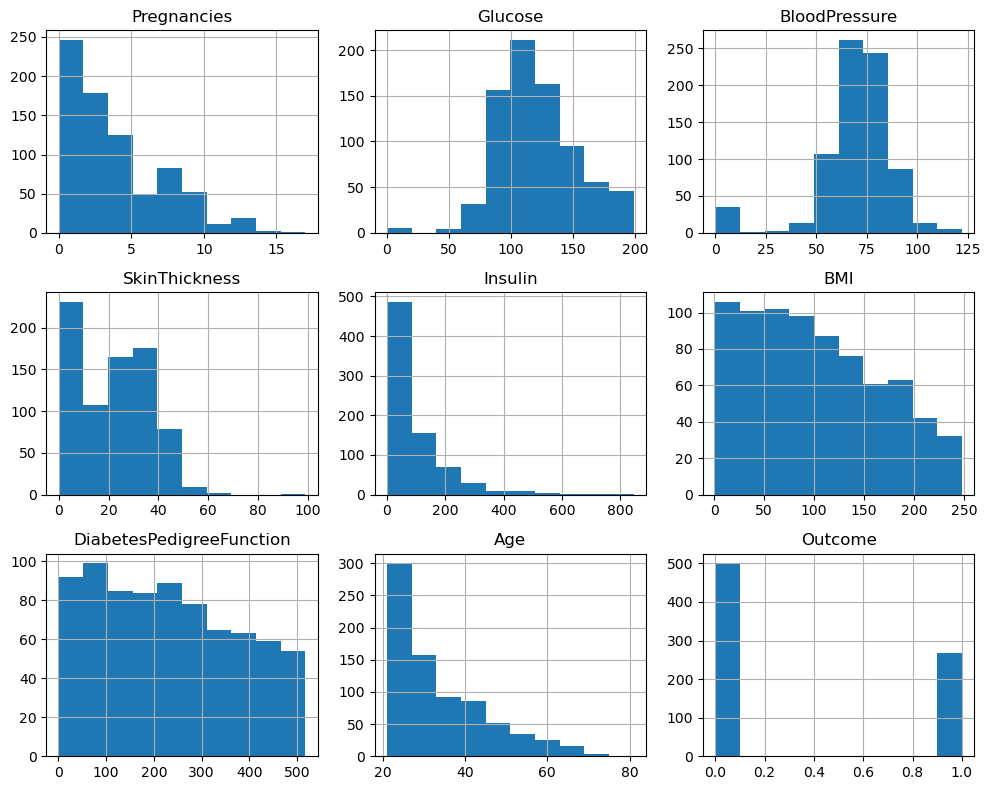

In [13]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

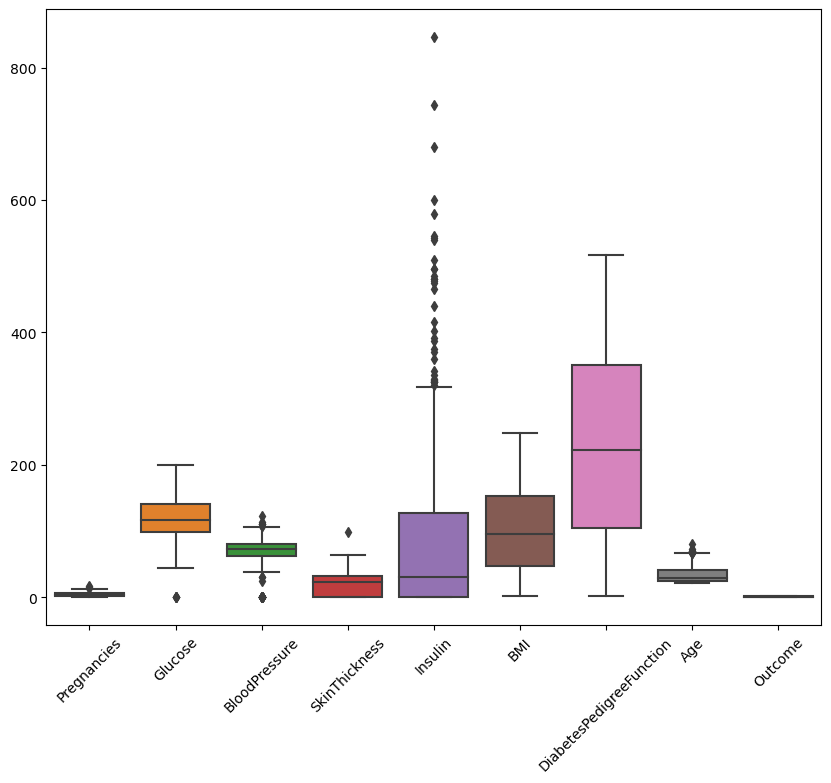

In [14]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

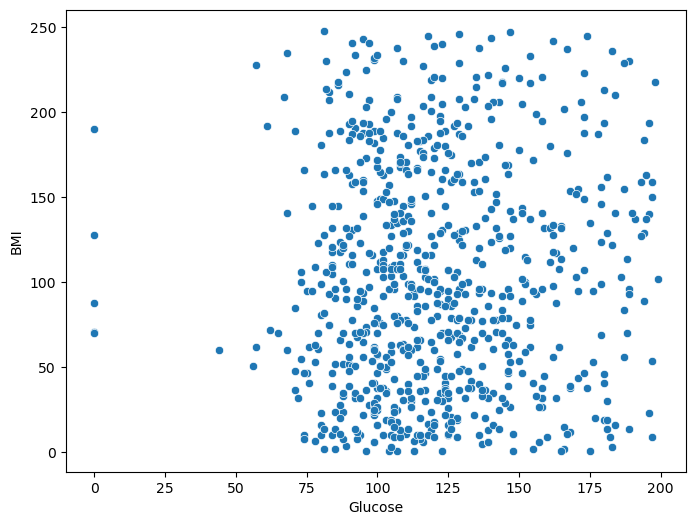

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Glucose', y='BMI')
plt.show()

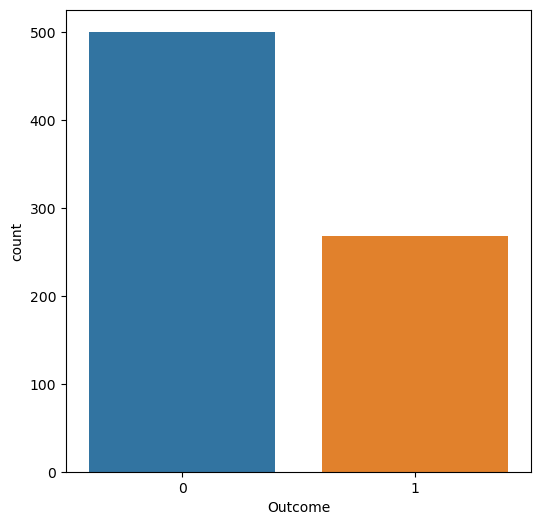

In [16]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Outcome')
plt.show()

**Class Imbalance**

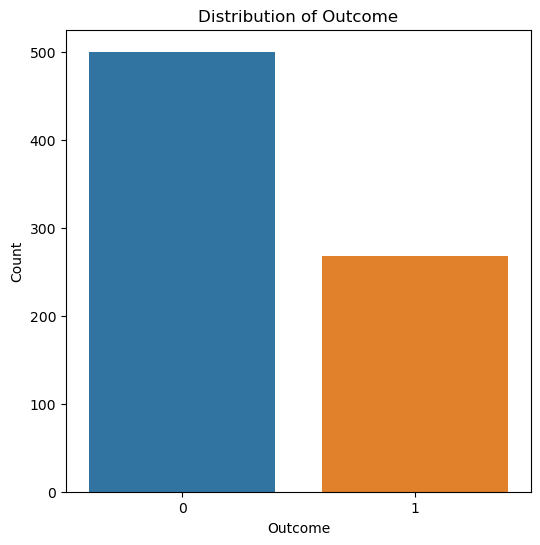

0    500
1    268
Name: Outcome, dtype: int64


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = df['Outcome'].value_counts()

plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.show()

print(class_counts)


**Feature Correlations**

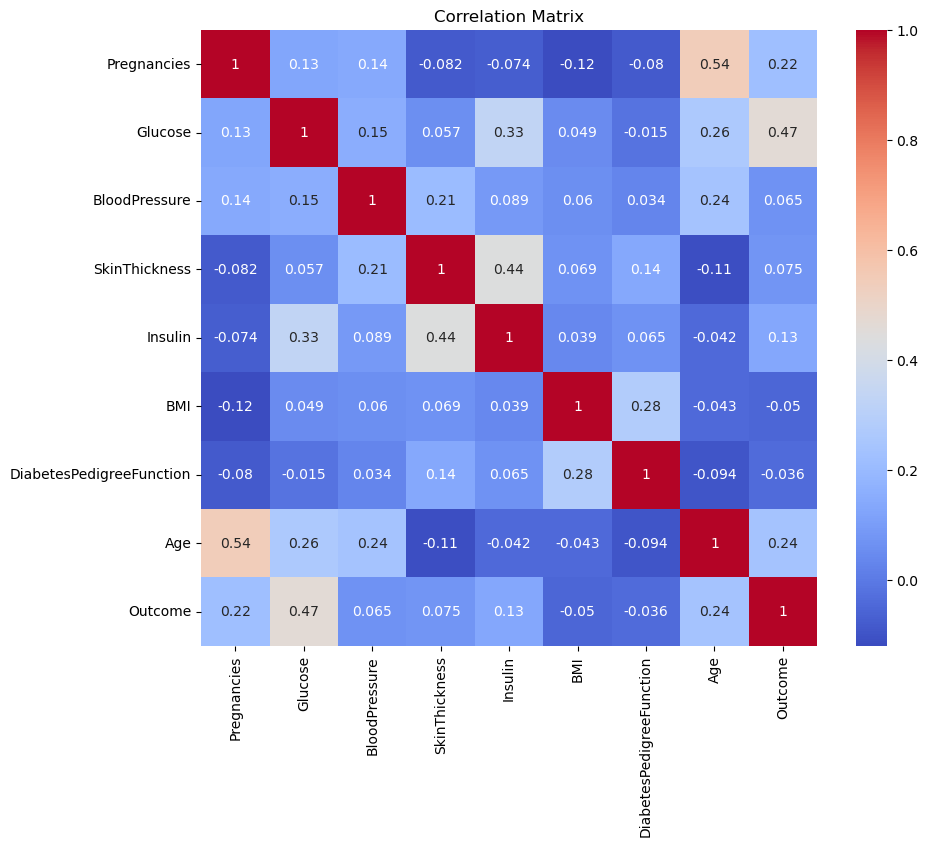

In [18]:
numerical_features = df.select_dtypes(include='number')

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',square=True)
plt.title('Correlation Matrix')
plt.show()

**Outiler Detection**


In [19]:
numericals=df.select_dtypes(include='number')

In [20]:
z_scores = (numericals-numericals.mean())/numericals.std()
zt=3

Text(0.5, 1.0, 'box plot of numerical features')

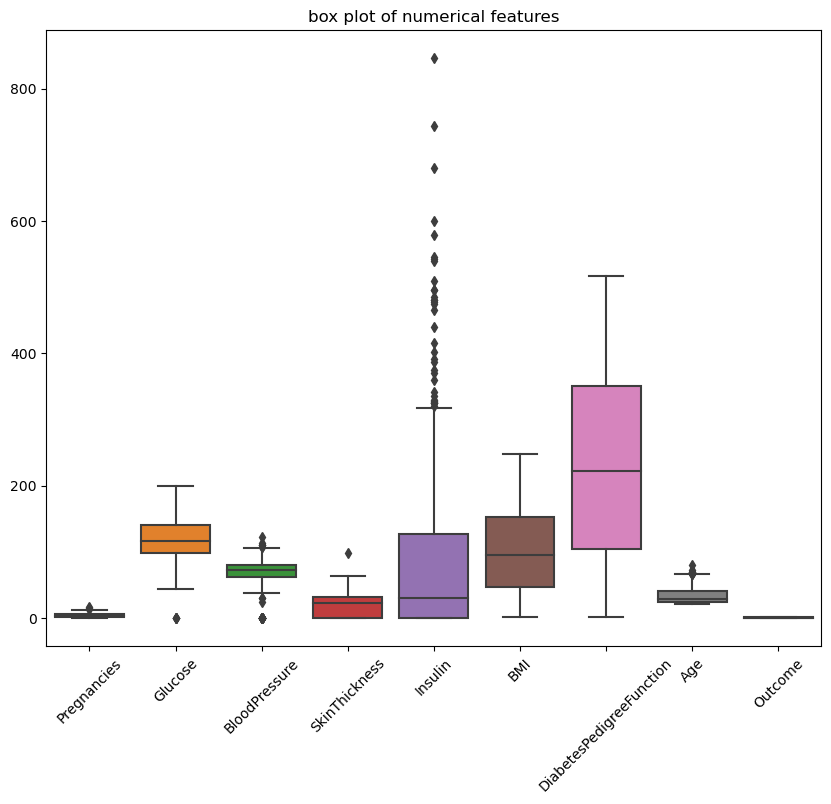

In [21]:
outliers=(z_scores > zt)|( z_scores < -zt)
plt.figure(figsize=(10,8))
sns.boxplot(data=numericals)
plt.xticks(rotation=45)
plt.title('box plot of numerical features')

In [22]:
print(outliers.sum())

Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                          0
DiabetesPedigreeFunction     0
Age                          5
Outcome                      0
dtype: int64


In [23]:
df.shape

(768, 9)

**KDE plot **

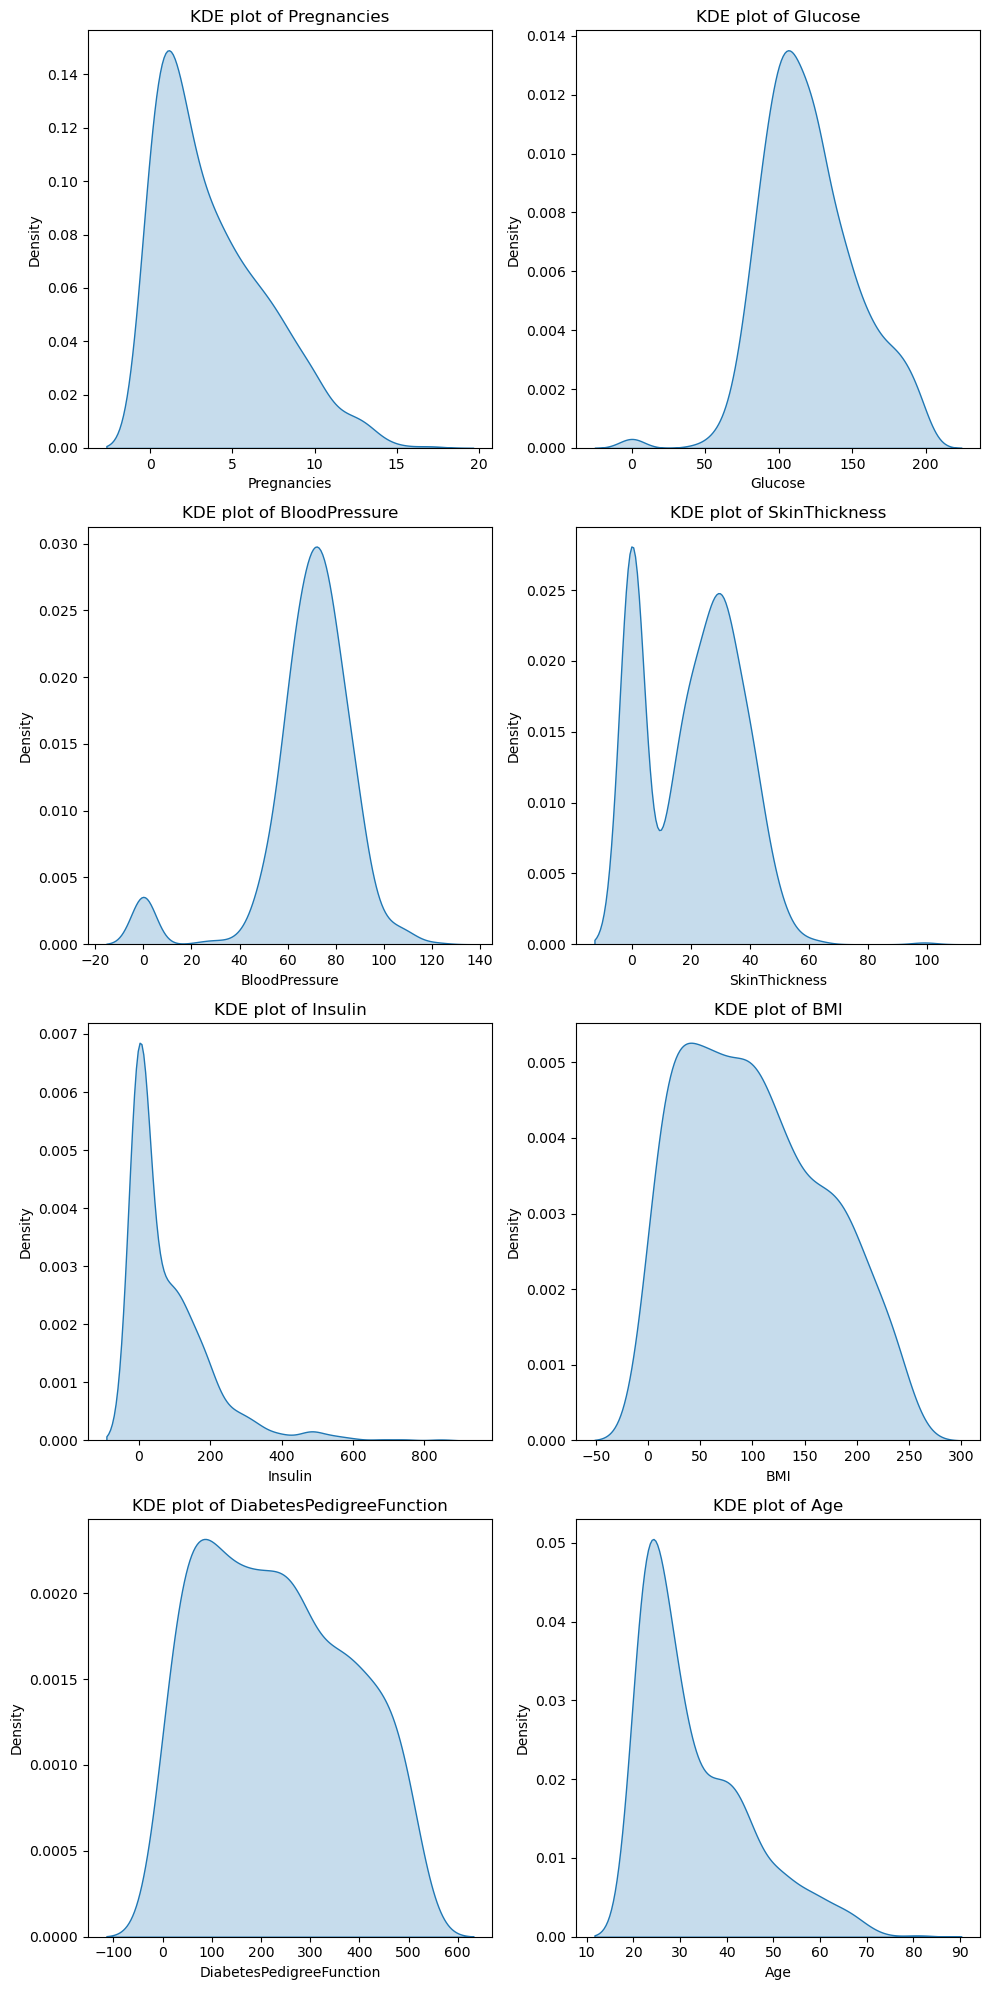

In [24]:
num_columns = len(df.columns.drop('Outcome'))
num_rows = (num_columns + 1) // 2

plt.figure(figsize=(10, 5*num_rows))
for i, column in enumerate(df.columns.drop('Outcome')):
    plt.subplot(num_rows, 2, i+1)
    sns.kdeplot(data=df[column], fill=True)
    plt.title(f'KDE plot of {column}')

plt.tight_layout()
plt.show()

**Splitting the Dataset into training set and test set**

In [25]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [26]:
x=df.drop(['Outcome'],1)
y=df['Outcome']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

**Scikit-Learn Pipeline**

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
pipeline_lr = Pipeline([('scalar1', StandardScaler()), ('lr_classifier', LogisticRegression())])
pipeline_knn = Pipeline([('scalar2', StandardScaler()), ('knn_classifier', KNeighborsClassifier())])
pipeline_dc = Pipeline([('scalar3', StandardScaler()), ('dc_classifier', DecisionTreeClassifier())])
pipeline_svc = Pipeline([('scalar4',StandardScaler()), ('svc_classifier', SVC())])
pipeline_rf = Pipeline([('scalar5', StandardScaler()), ('rf_classifier', RandomForestClassifier())])
pipeline_gb = Pipeline([('scalar6', StandardScaler()), ('gb_classifier', GradientBoostingClassifier())])

In [30]:
pipelines=[pipeline_lr,pipeline_knn,pipeline_dc,pipeline_svc,pipeline_rf,pipeline_gb]

In [31]:
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [32]:
pipe_dict = {0:'LR',1:'knn',2:'dc',3:'svc',4:'rf',5:'gb'}

In [33]:
pipe_dict

{0: 'LR', 1: 'knn', 2: 'dc', 3: 'svc', 4: 'rf', 5: 'gb'}

In [34]:
for i,model in enumerate(pipelines):
    print('{} test accuracy:{}'.format(pipe_dict[i],model.score(x_test,y_test)*100))

LR test accuracy:75.97402597402598
knn test accuracy:74.67532467532467
dc test accuracy:68.18181818181817
svc test accuracy:77.92207792207793
rf test accuracy:79.22077922077922
gb test accuracy:75.97402597402598


In [35]:
model=RandomForestClassifier(max_depth=5)

In [36]:
new_data=pd.DataFrame({
    'Pregnancies':7,
    'Glucose':150.0,
    'BloodPressure':70.0,
    'SkinThickness':35.0,
    'Insulin':79.98,
       'BMI':34.0, 
    'DiabetesPedigreeFunction':0.643, 
    'Age':60,
},index=[0])

In [37]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [38]:
y_pred=model.predict(new_data)

In [39]:
if y_pred[0] == 0:
    print('non-diabetic')
else:
    print('diabetic')
    

non-diabetic


**saving model using joblib**

In [40]:
import joblib

In [41]:
joblib.dump(model,'model_diabetics')

['model_diabetics']

In [42]:
model1=joblib.load('model_diabetics')

In [43]:
model1.predict(new_data)

array([0], dtype=int64)